In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df_train = pd.read_csv('data/data_datetime.csv', sep=',')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STD_DT       835200 non-null  object 
 1   NUM          835200 non-null  int64  
 2   MELT_TEMP    835200 non-null  int64  
 3   MOTORSPEED   835200 non-null  int64  
 4   MELT_WEIGHT  835200 non-null  int64  
 5   INSP         835200 non-null  float64
 6   TAG          835200 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ MB


In [3]:
encoder = preprocessing.LabelEncoder()
df_train['TAG'] = encoder.fit_transform(df_train['TAG'])
df_train['TAG'] = df_train['TAG'].astype('int')

In [4]:
df_MWzeroidx = df_train[df_train['MELT_WEIGHT']==0]

idxlst = []

for i in range(0, len(df_MWzeroidx.index)):
    
    if df_MWzeroidx.index[i] - df_MWzeroidx.index[i-1] < 300:
        continue
    idxlst.append(df_MWzeroidx.index[i])

idxlst.insert(0, 0)
idxlst.insert(1,406)

proclst = []
for i in range(1,len(idxlst)):
    proclst.append([idxlst[i-1],idxlst[i]])

In [5]:
ngproclst = []
okproclst = []
for procidx in proclst:
    df_proc = df_train.iloc[procidx[0]:procidx[1],:]
    if df_proc['TAG'][df_proc['TAG']==0].count() > 0:
        ngproclst.append(procidx)
        continue
    okproclst.append(procidx)

In [6]:
len(okproclst)

634

In [7]:
len(ngproclst)

607

In [8]:
randlst = []
for _ in range(0, 5):
    randlst.append(random.randrange(0, len(proclst)))
print(randlst)

[1103, 186, 136, 1222, 917]


In [9]:
from statsmodels.tsa.stattools import adfuller
# 정상성 판단 ADF(Augmented Dicky-Fuller Test) 검정
def print_adfuller (x):
    result = adfuller(x)
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [10]:
df_train = df_train.set_index(['STD_DT'])

In [11]:
df_MELT_TEMP = df_train[['MELT_TEMP']].copy()
# 차분
df_MELT_TEMP['diff'] = df_train['MELT_TEMP'].diff(1)
# 로그
df_MELT_TEMP['log'] = np.log(df_train['MELT_TEMP'])
# 로그차분
df_MELT_TEMP['logdiff'] = np.log(df_train['MELT_TEMP']).diff(1)


In [12]:
df_MELT_WEIGHT = df_train[['MELT_WEIGHT']].copy()
# 차분
df_MELT_WEIGHT['diff'] = df_train['MELT_WEIGHT'].diff(1)
# 로그
df_MELT_WEIGHT['log'] = np.log1p(df_train['MELT_WEIGHT'])
# 로그차분
df_MELT_WEIGHT['logdiff'] = np.log1p(df_train['MELT_WEIGHT']).diff(1)

In [13]:
df_INSP = df_train[['INSP']].copy()
# 차분
df_INSP['diff'] = df_train['INSP'].diff(1)
# 로그
df_INSP['log'] = np.log1p(df_train['INSP'])
# 로그차분
df_INSP['logdiff'] = np.log1p(df_train['INSP']).diff(1)

In [14]:
df_MOTORSPEED = df_train[['MOTORSPEED']].copy()
# 차분
df_MOTORSPEED['diff'] = df_train['MOTORSPEED'].diff(1)
# 로그
df_MOTORSPEED['log'] = np.log1p(df_train['MOTORSPEED'])
# 로그차분
df_MOTORSPEED['logdiff'] = np.log1p(df_train['MOTORSPEED']).diff(1)

In [18]:

print("MELT_TEMP stationarity")
print_adfuller(df_MELT_TEMP['MELT_TEMP'])
print("-"*30)
print_adfuller(df_MELT_TEMP['log_MELT_TEMP'])
print("-"*30)
print_adfuller(df_MELT_TEMP['diff_MELT_TEMP'][1:]) 
print("-"*30)
print_adfuller(df_MELT_TEMP['logdiff_MELT_TEMP'][1:])
print("-"*30)

MELT_TEMP stationarity
ADF Statistic: -86.305
p-value: 0.000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
------------------------------
ADF Statistic: -86.250
p-value: 0.000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
------------------------------
ADF Statistic: -144.690
p-value: 0.000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
------------------------------
ADF Statistic: -144.699
p-value: 0.000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
------------------------------


In [27]:
print("MOTORSPEED stationarity")
print_adfuller(df_MOTORSPEED['MOTORSPEED'])
print("-"*30)
# print_adfuller(df_MOTORSPEED['log'])
# print("-"*30)
# print_adfuller(df_MOTORSPEED['diff'][1:]) 
# print("-"*30)
# print_adfuller(df_MOTORSPEED['logdiff'][1:])
# print("-"*30)

MOTORSPEED stationarity
ADF Statistic: -85.905
p-value: 0.000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
------------------------------


In [28]:
print("MELT_WEIGHT stationarity")
print_adfuller(df_MELT_WEIGHT['MELT_WEIGHT'])
print("-"*30)
print_adfuller(df_MELT_WEIGHT['log'])
print("-"*30)
print_adfuller(df_MELT_WEIGHT['diff'][1:]) 
print("-"*30)
print_adfuller(df_MELT_WEIGHT['logdiff'][1:])
print("-"*30)

MELT_WEIGHT stationarity
ADF Statistic: -35.701
p-value: 0.000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
------------------------------
ADF Statistic: -58.716
p-value: 0.000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
------------------------------
ADF Statistic: -102.725
p-value: 0.000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
------------------------------
ADF Statistic: -97.355
p-value: 0.000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
------------------------------


In [34]:
print("INSP stationarity")
print_adfuller(df_INSP['INSP'])
print("-"*30)
# print_adfuller(df_INSP['log'])
# print("-"*30)
# print_adfuller(df_INSP['diff'][1:]) 
# print("-"*30)
# print_adfuller(df_INSP['logdiff'][1:])
# print("-"*30)

INSP stationarity
ADF Statistic: -86.234
p-value: 0.000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
------------------------------


In [15]:
from statsmodels.graphics.tsaplots import plot_acf

In [28]:
def adfPlot(df, cols, lst):    
    fig,ax = plt.subplots(2,2, figsize=(15,10))

    plot_acf(df[cols[0]][lst[0]:lst[1]+1],ax=ax[0,0])
    ax[0,0].set_title('original')
    plot_acf(df[cols[1]][lst[0]:lst[1]+1],ax=ax[0,1])
    ax[0,1].set_title('diff')
    plot_acf(df[cols[2]][lst[0]:lst[1]+1],ax=ax[1,0])
    ax[1,0].set_title('log')
    plot_acf(df[cols[3]][lst[0]:lst[1]+1],ax=ax[1,1])
    ax[1,1].set_title('logdiff')

    plt.show()

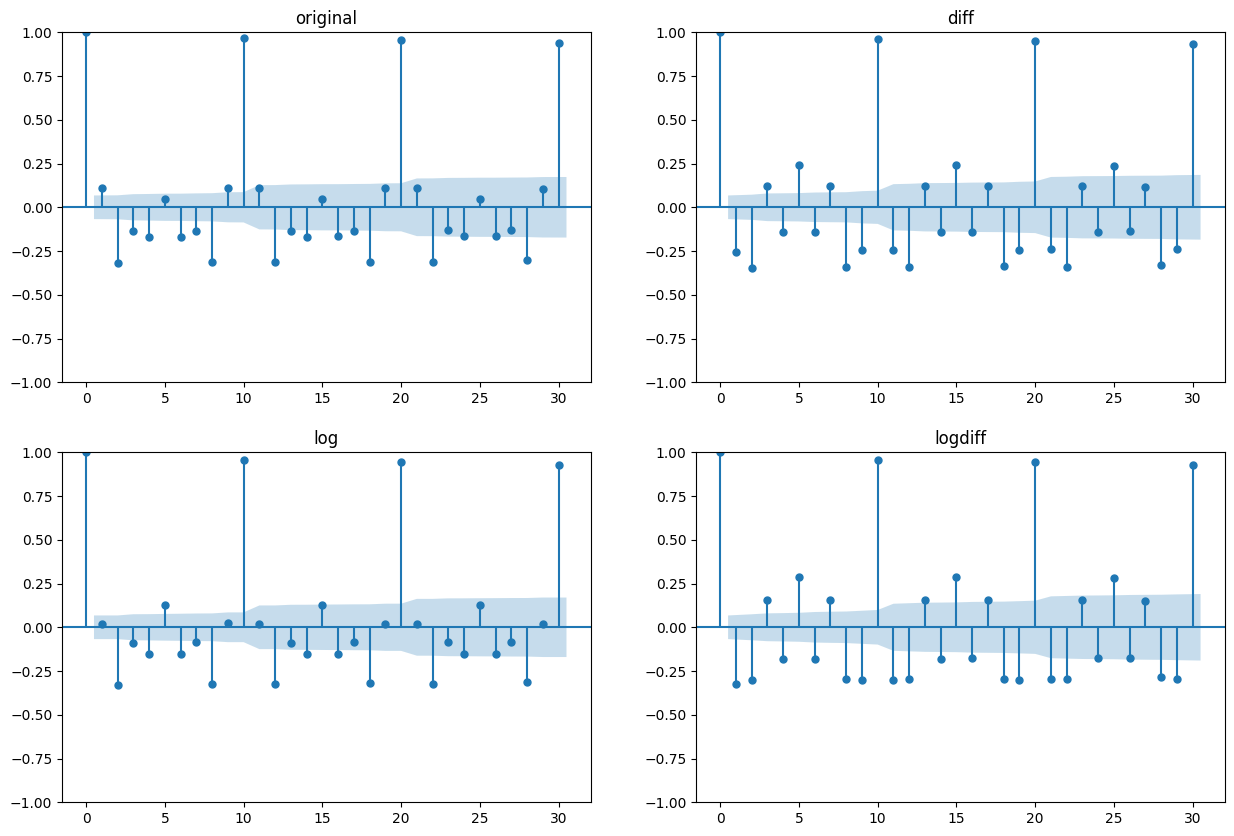

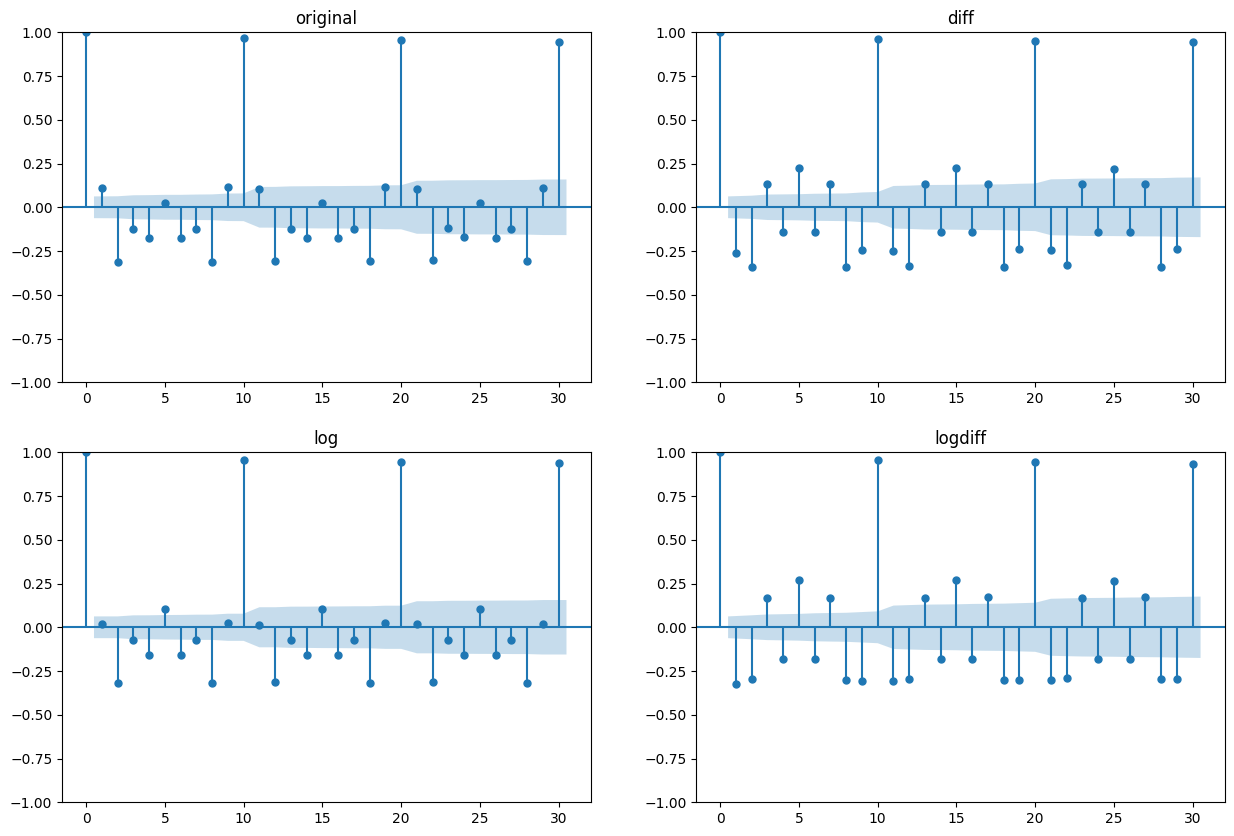

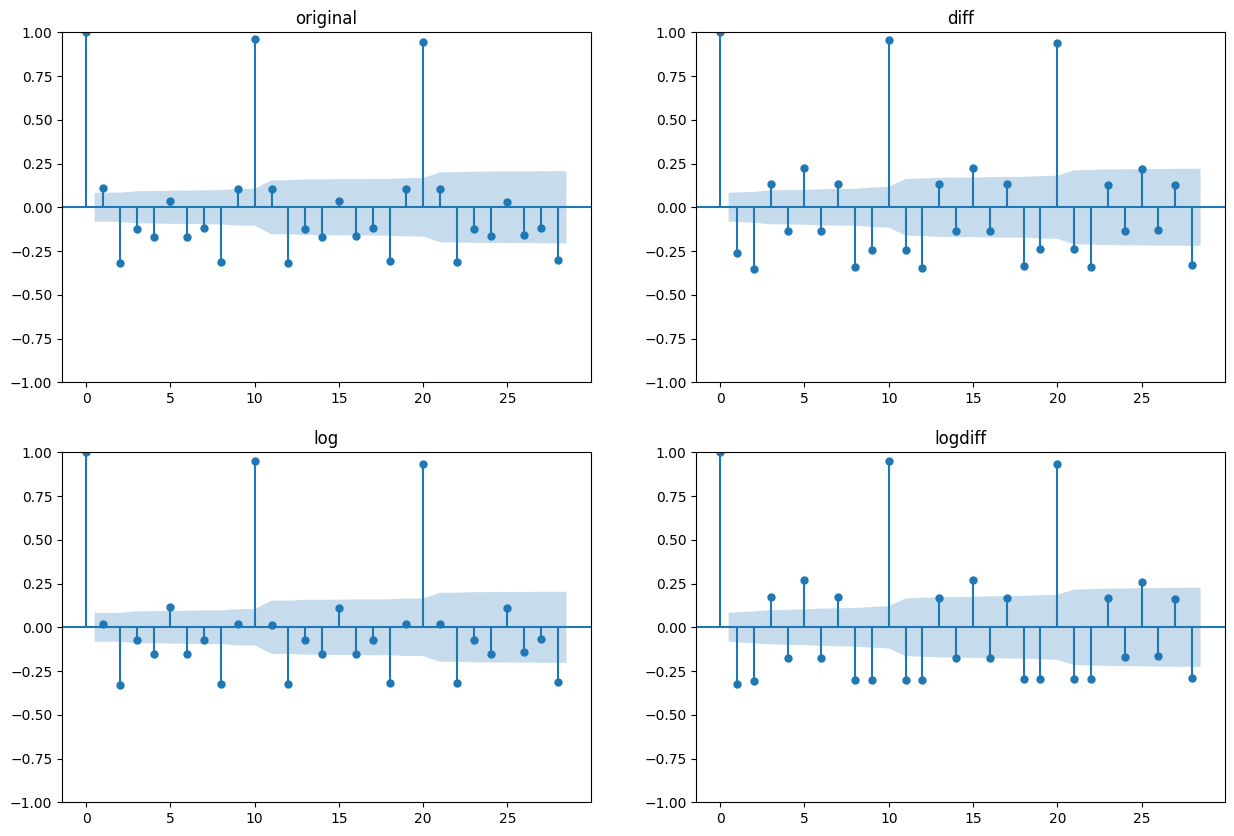

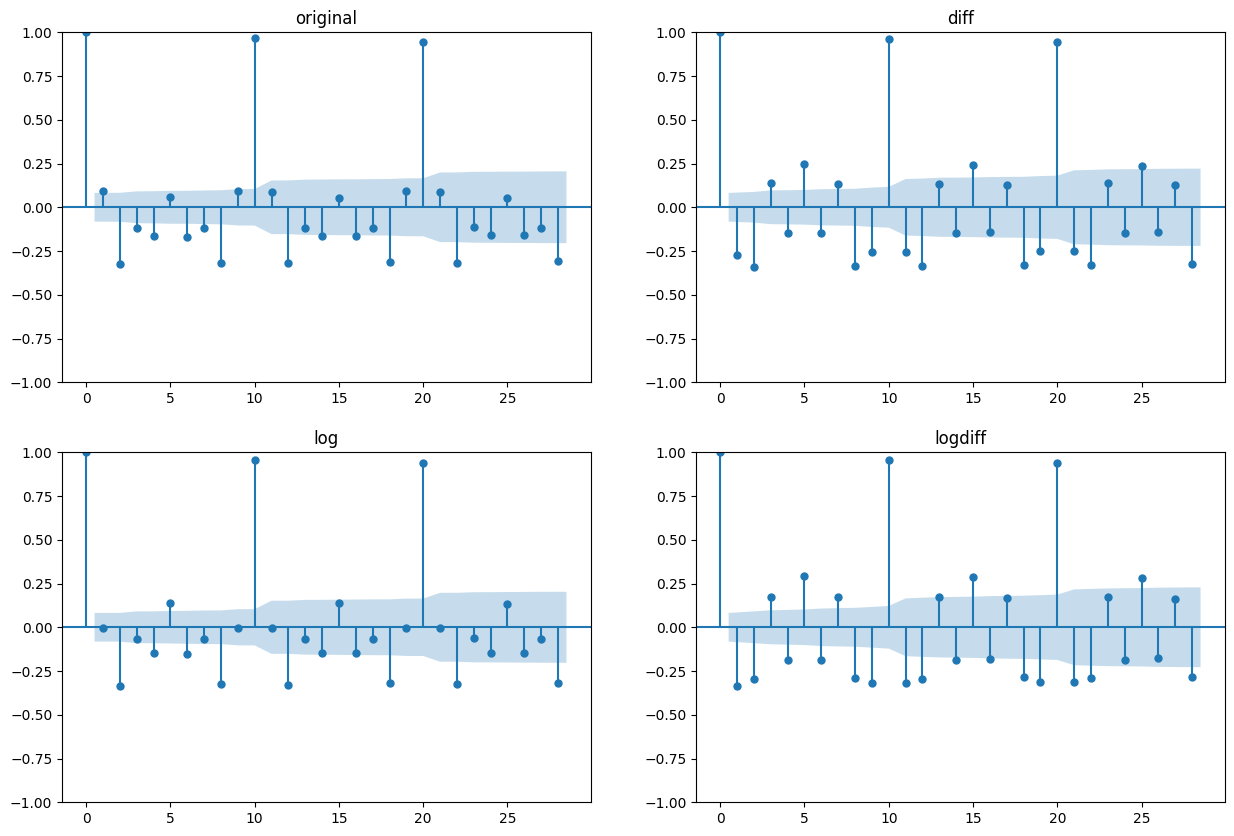

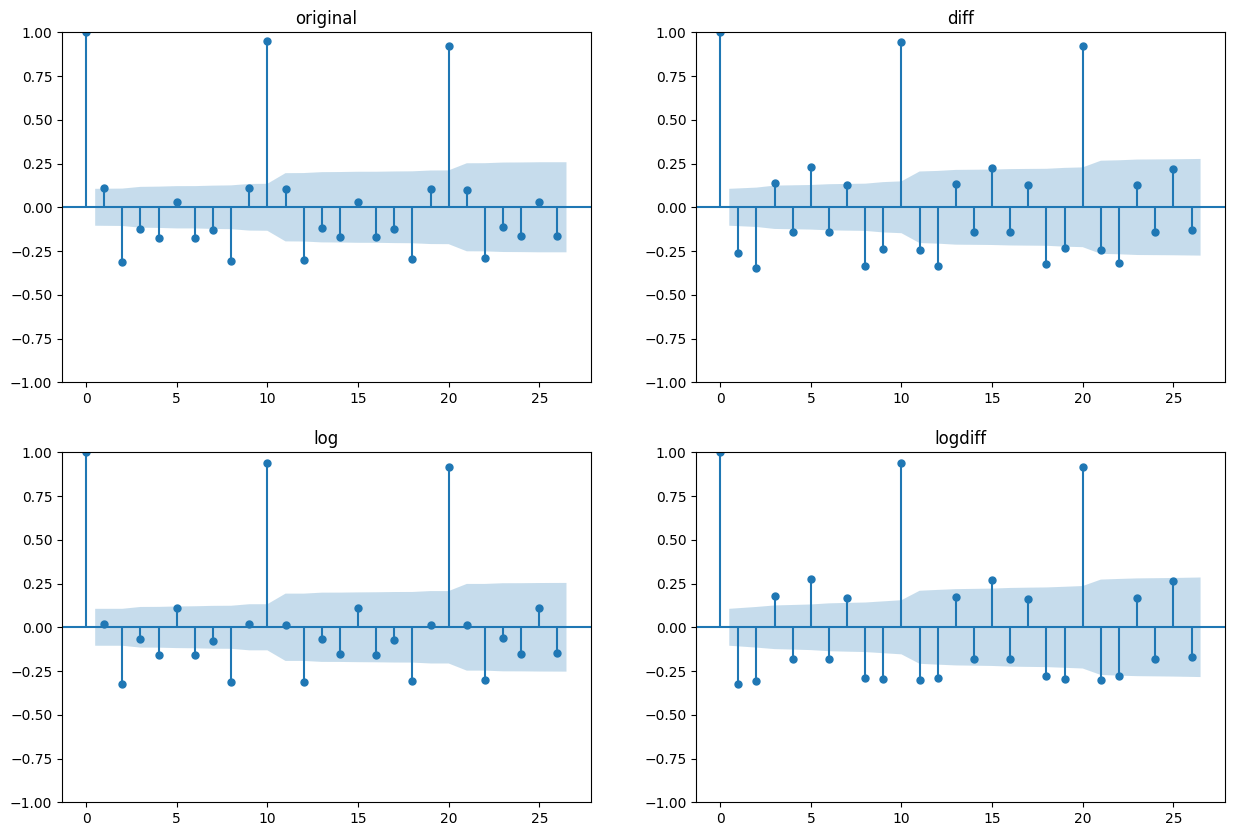

In [29]:
cols = ['MELT_TEMP', 'diff','log', 'logdiff']
for rand in randlst:
    adfPlot(df_MELT_TEMP, cols, proclst[rand])

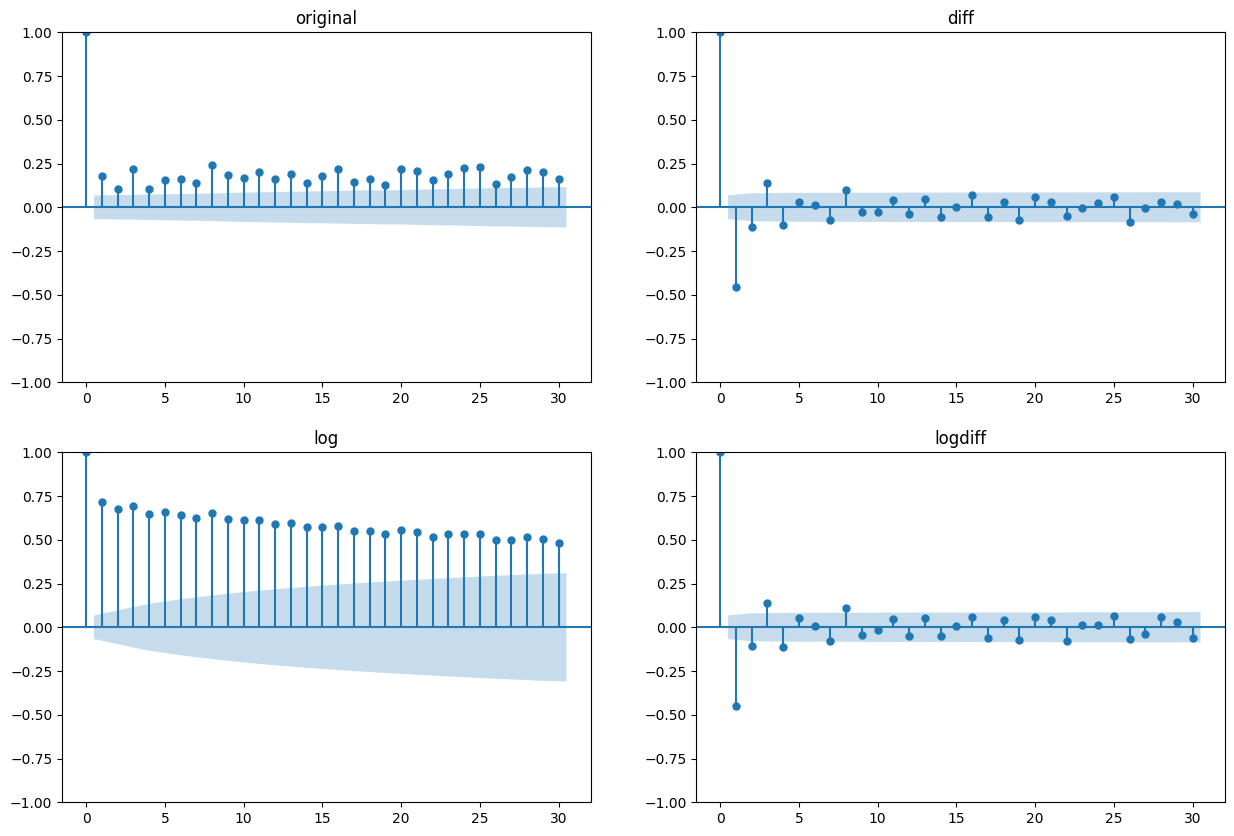

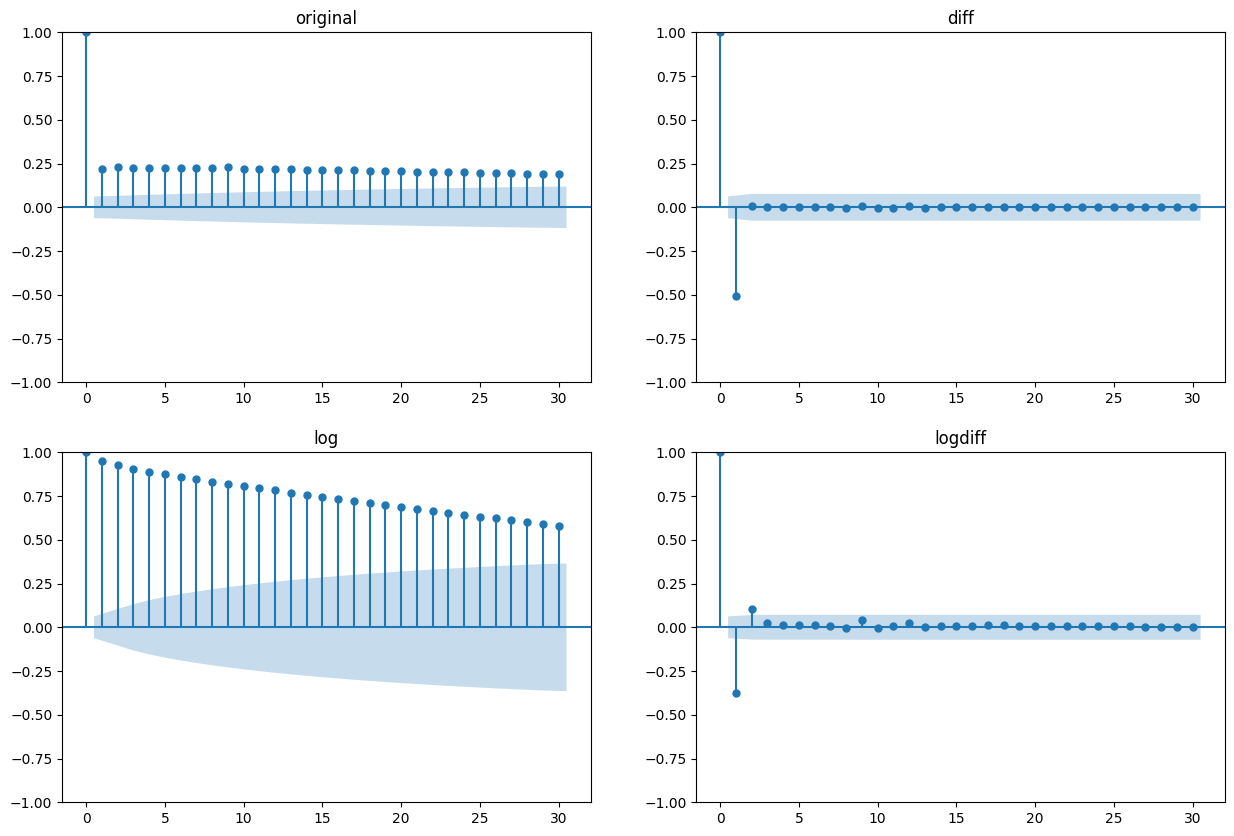

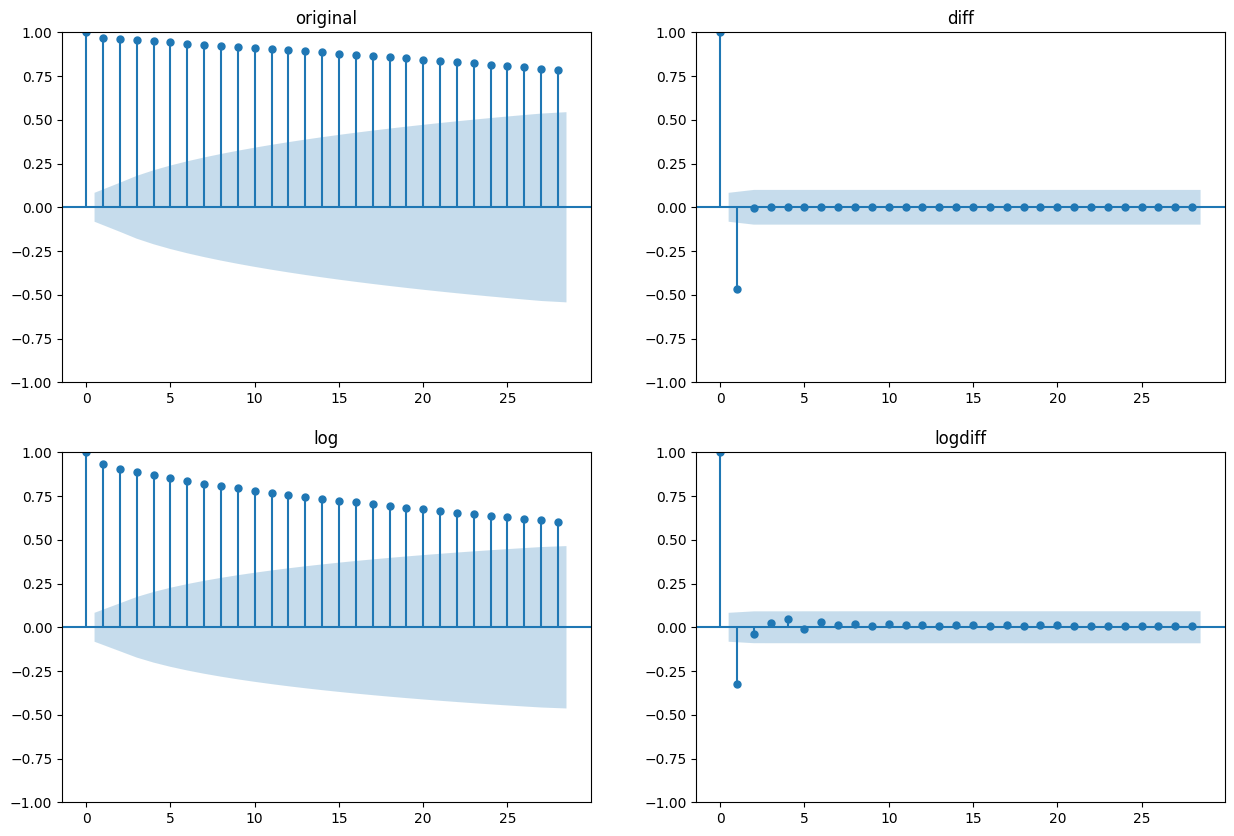

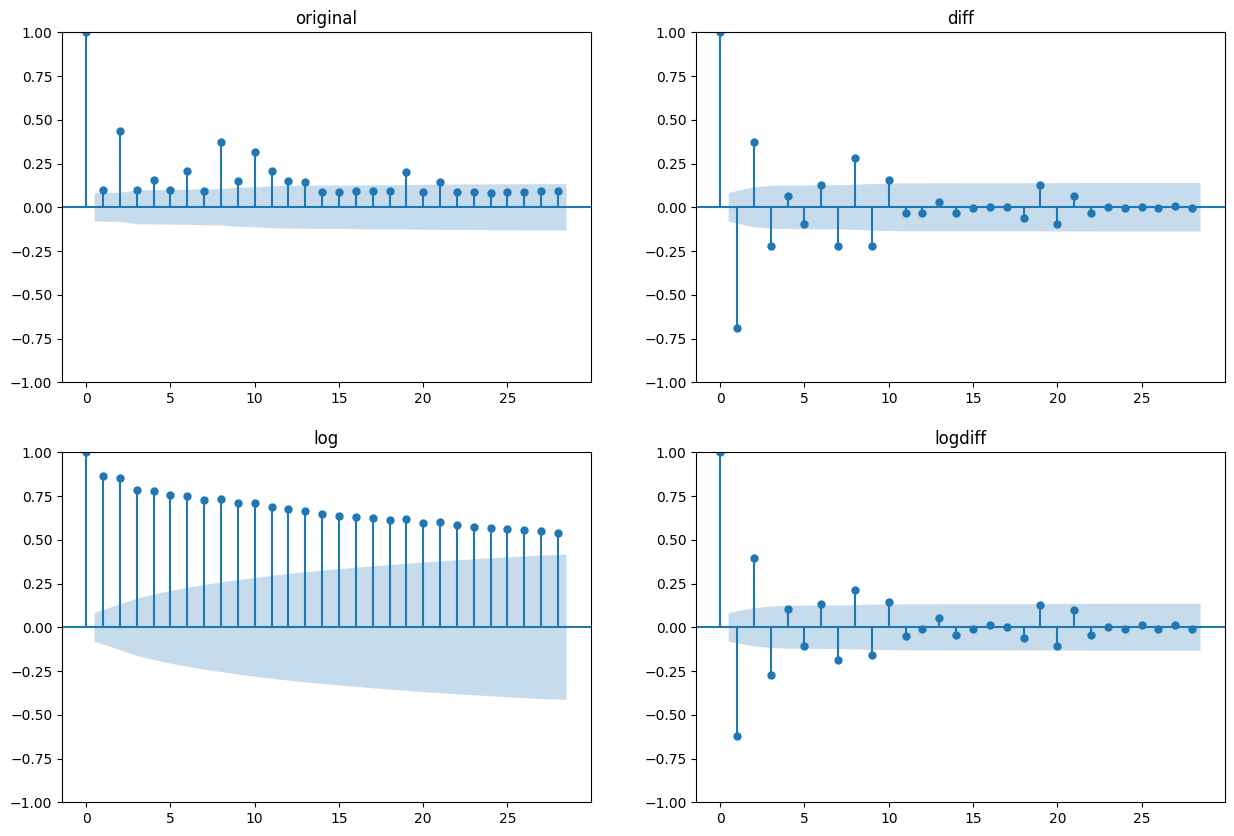

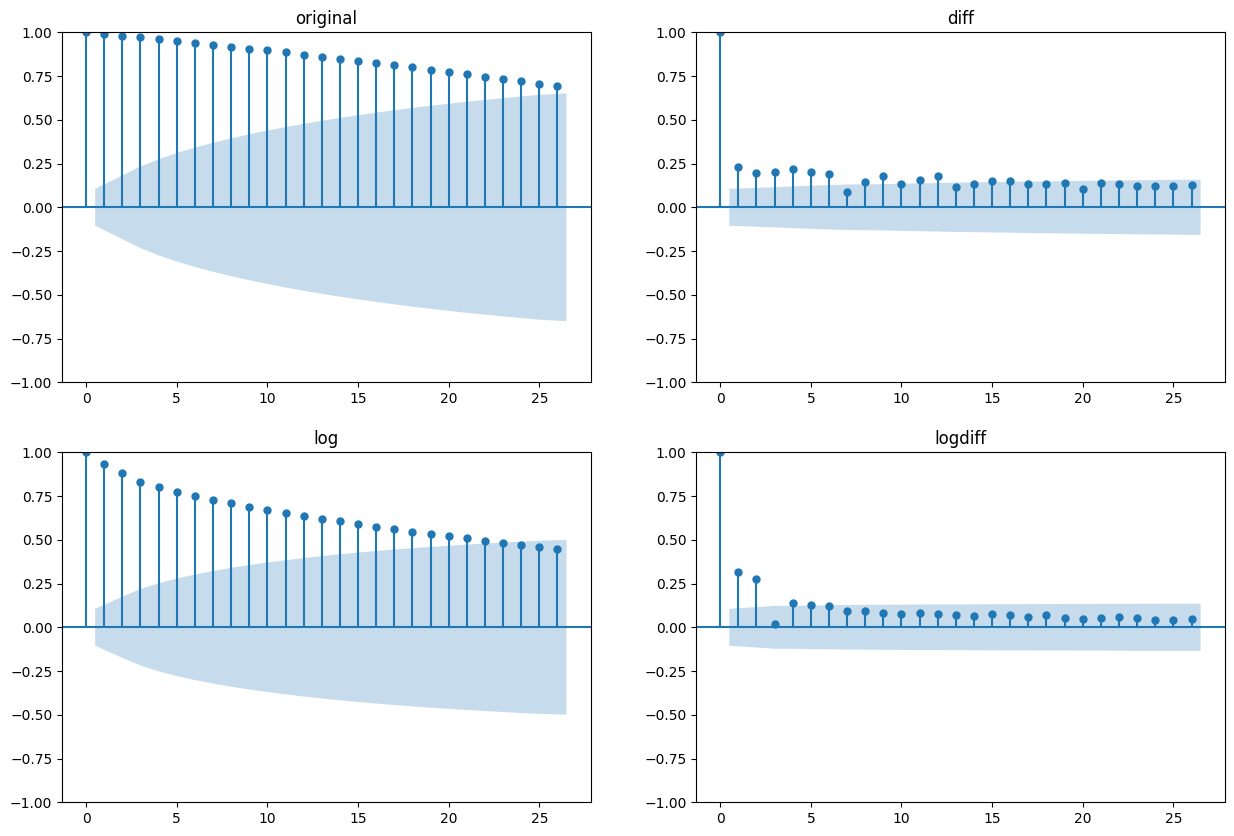

In [30]:
cols = ['MELT_WEIGHT', 'diff','log', 'logdiff']
for rand in randlst:
    adfPlot(df_MELT_WEIGHT, cols, proclst[rand])

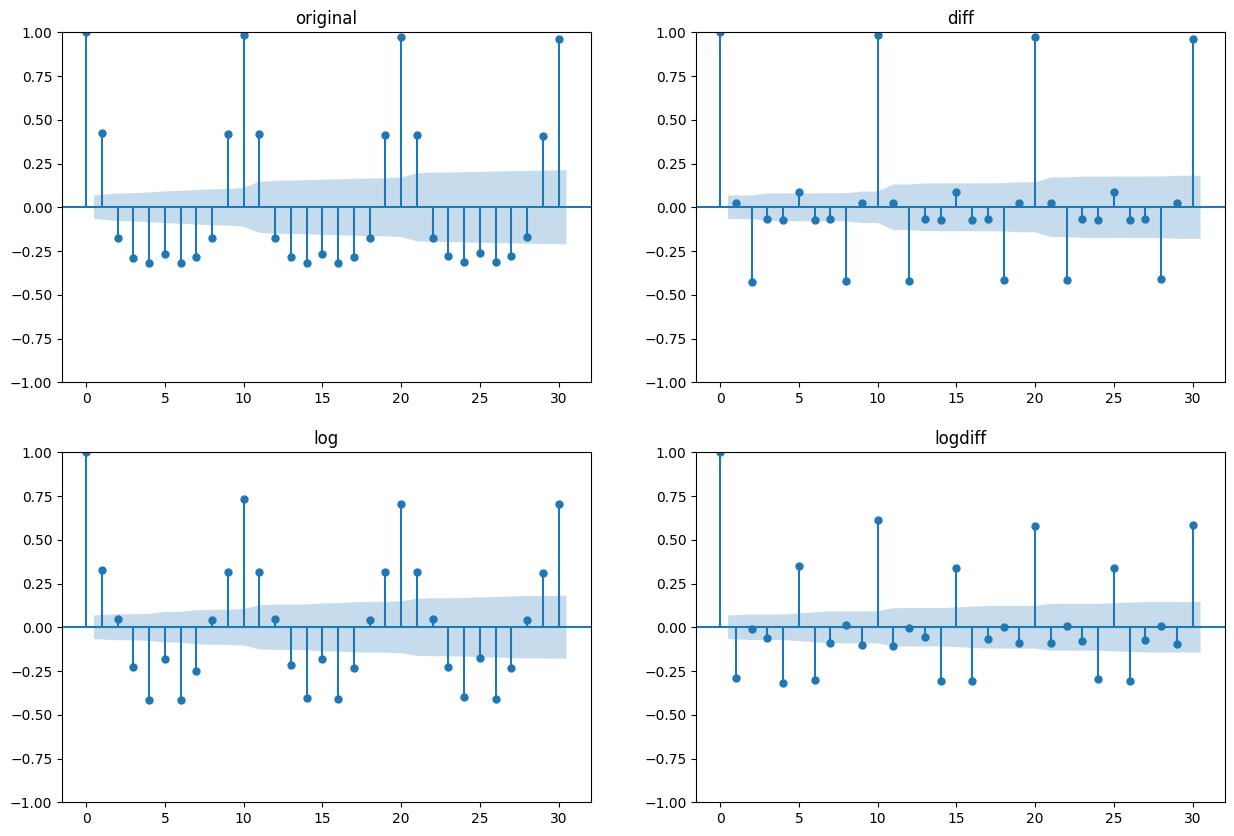

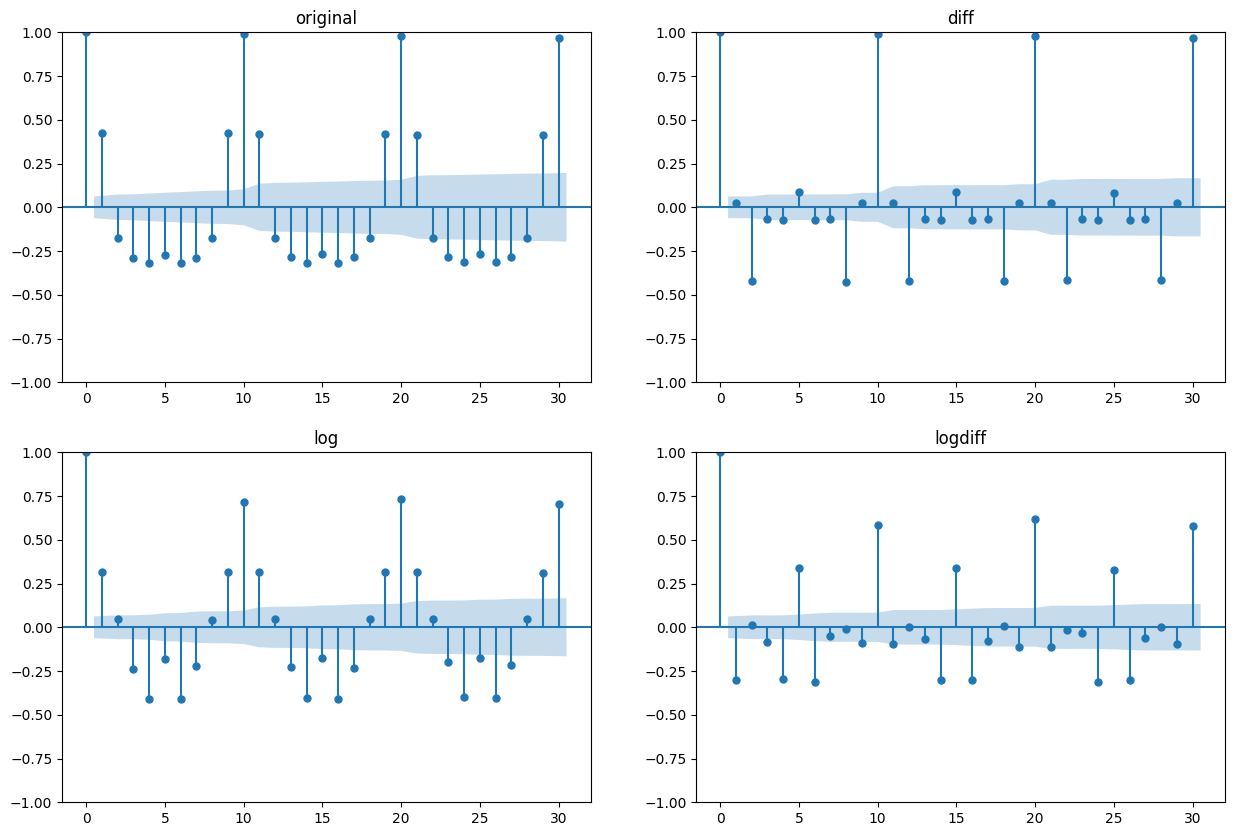

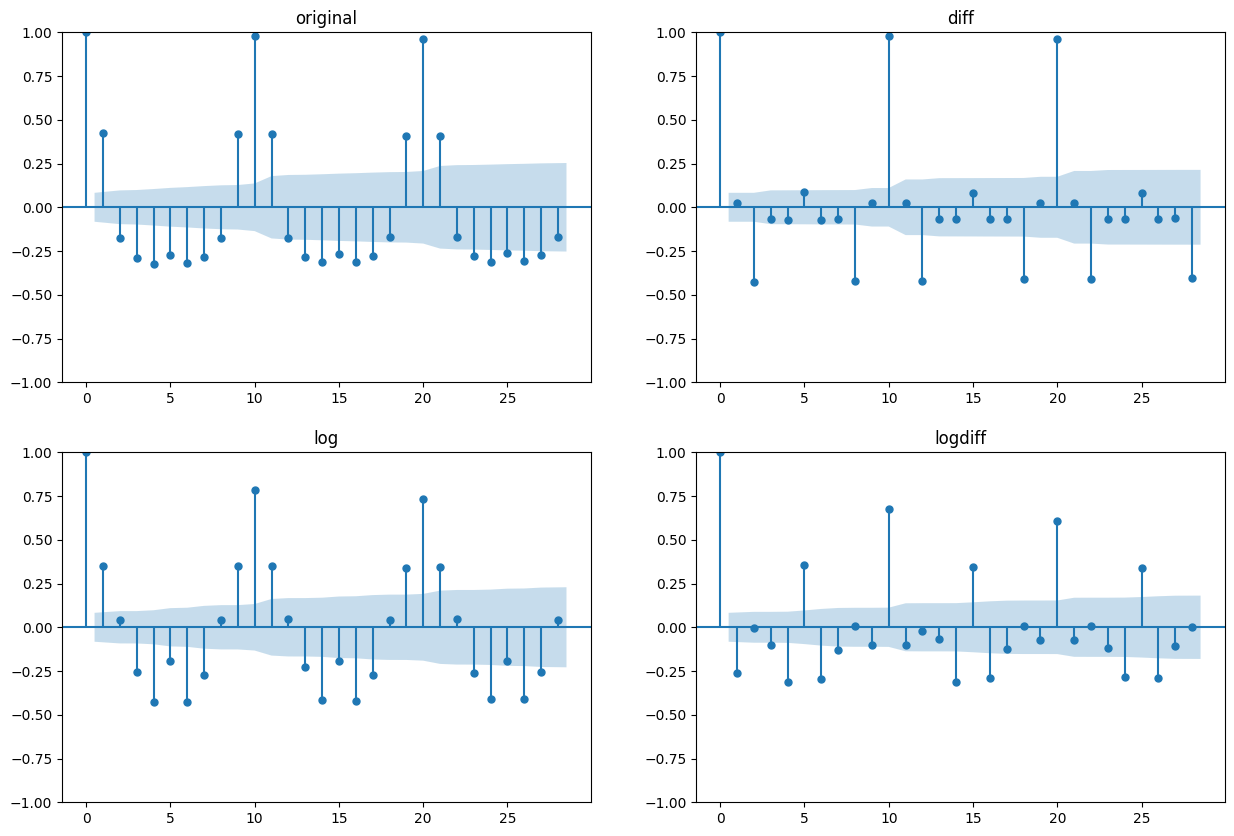

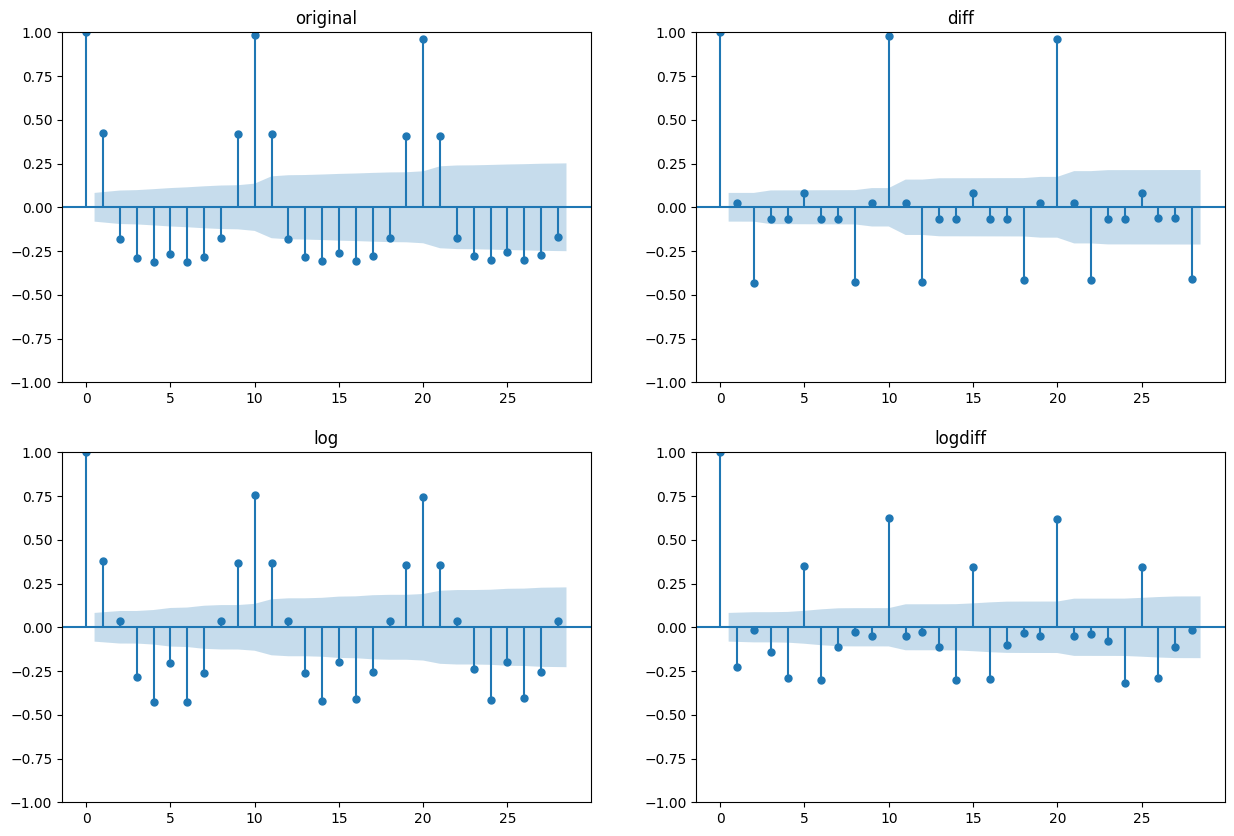

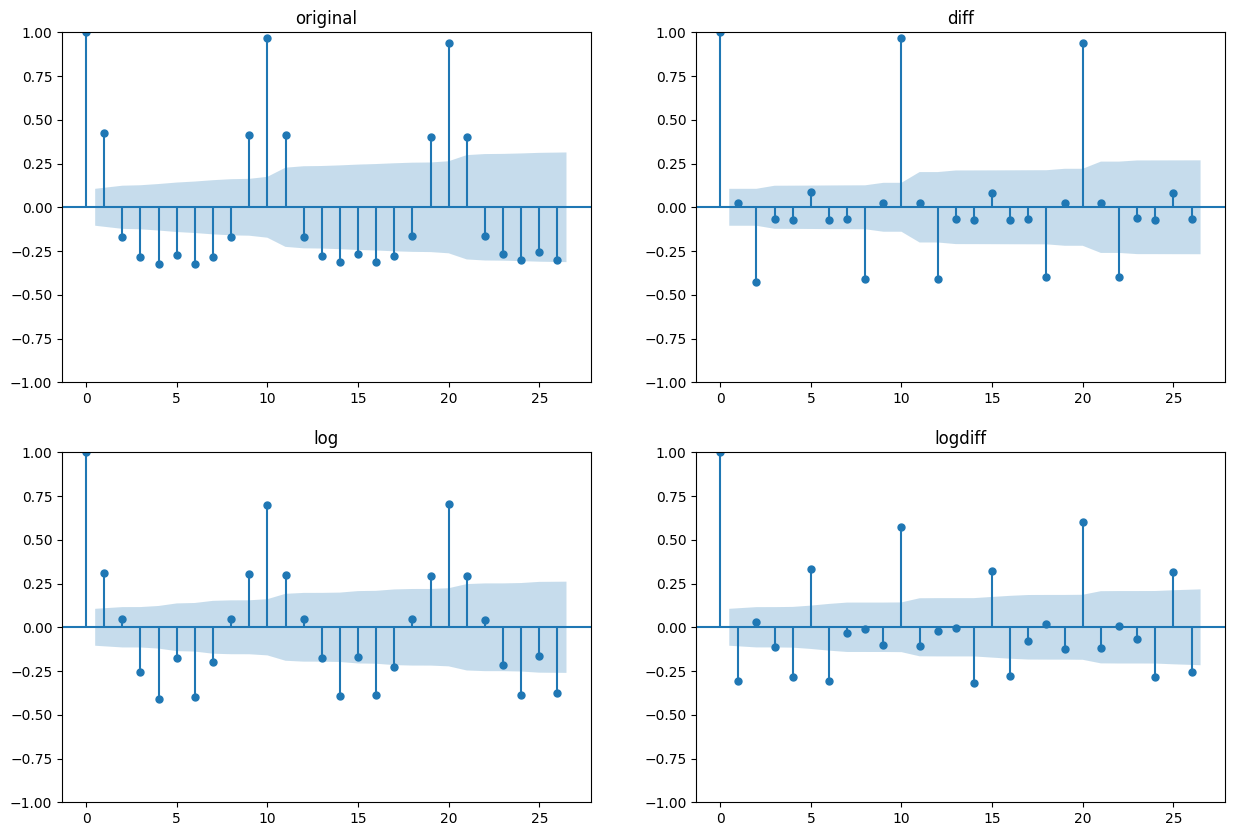

In [31]:
cols = ['MOTORSPEED', 'diff','log', 'logdiff']
for rand in randlst:
    adfPlot(df_MOTORSPEED, cols, proclst[rand])

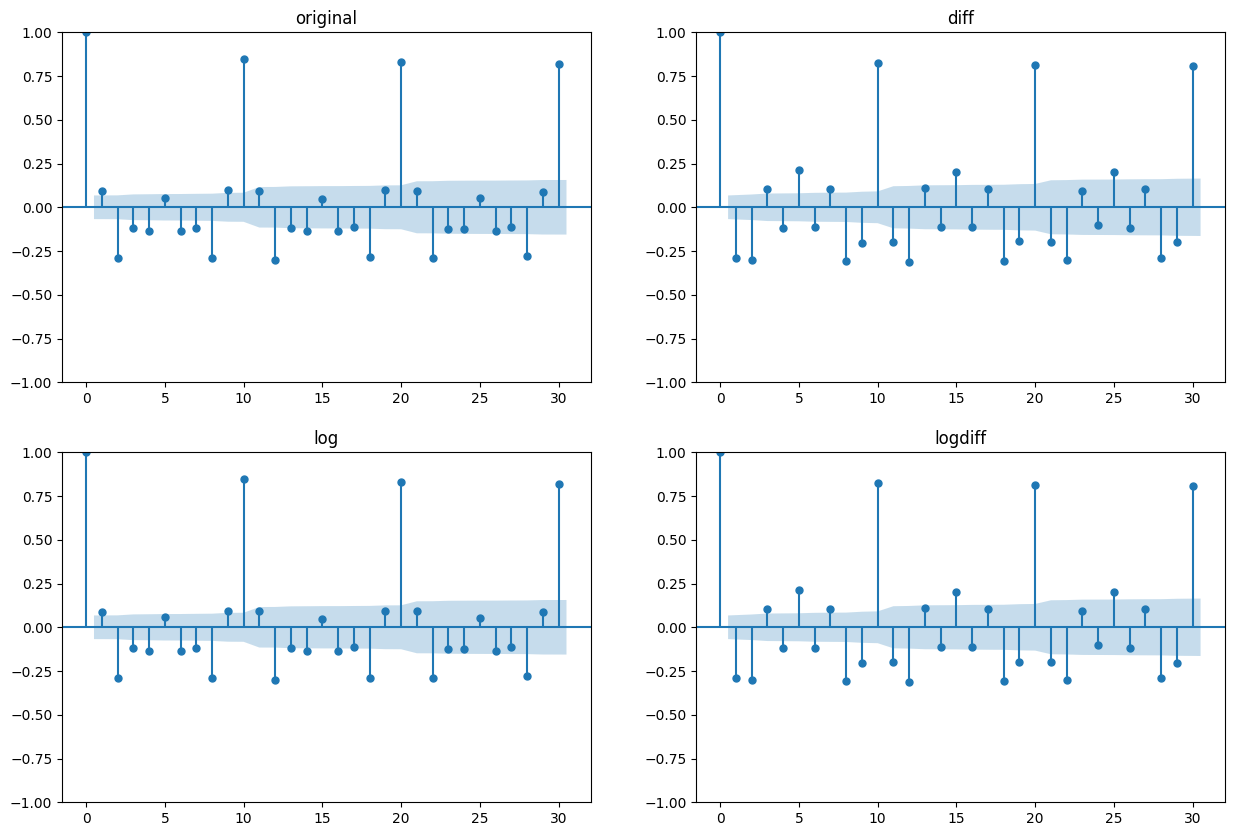

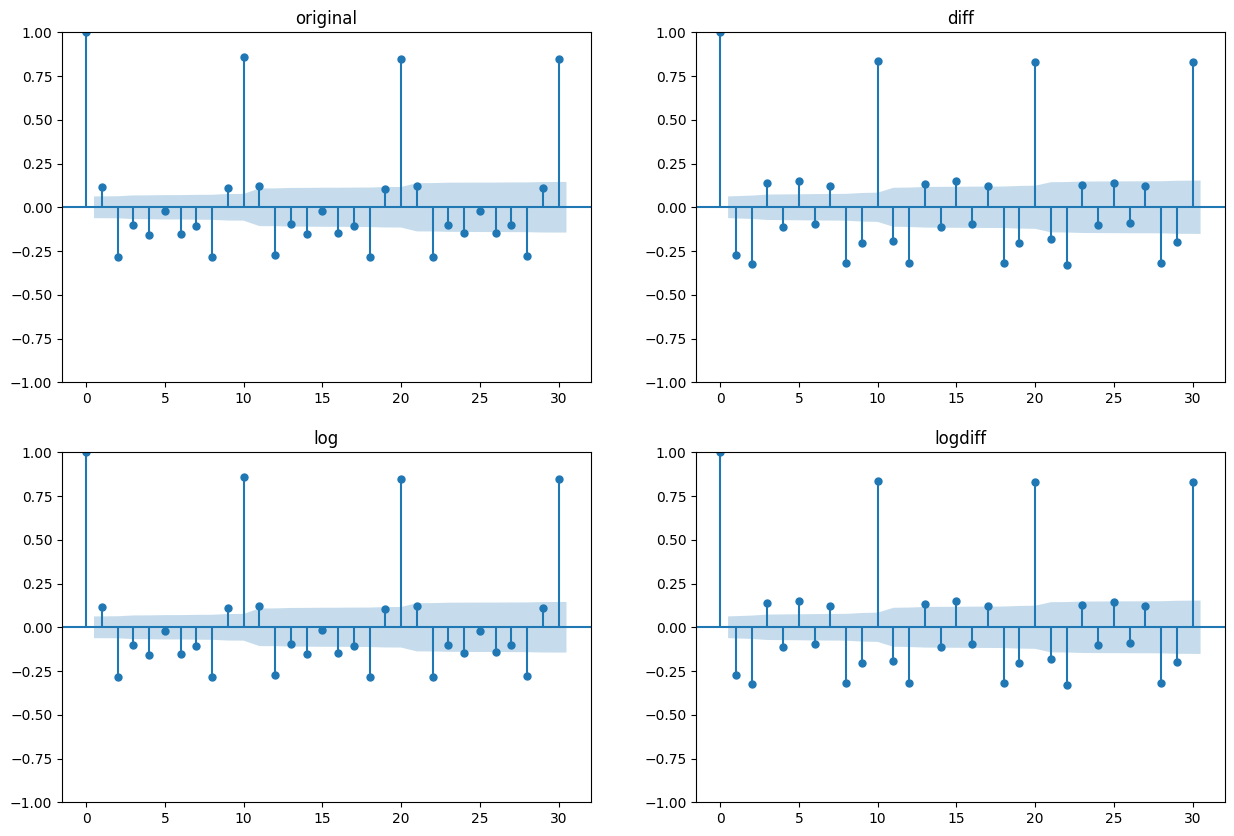

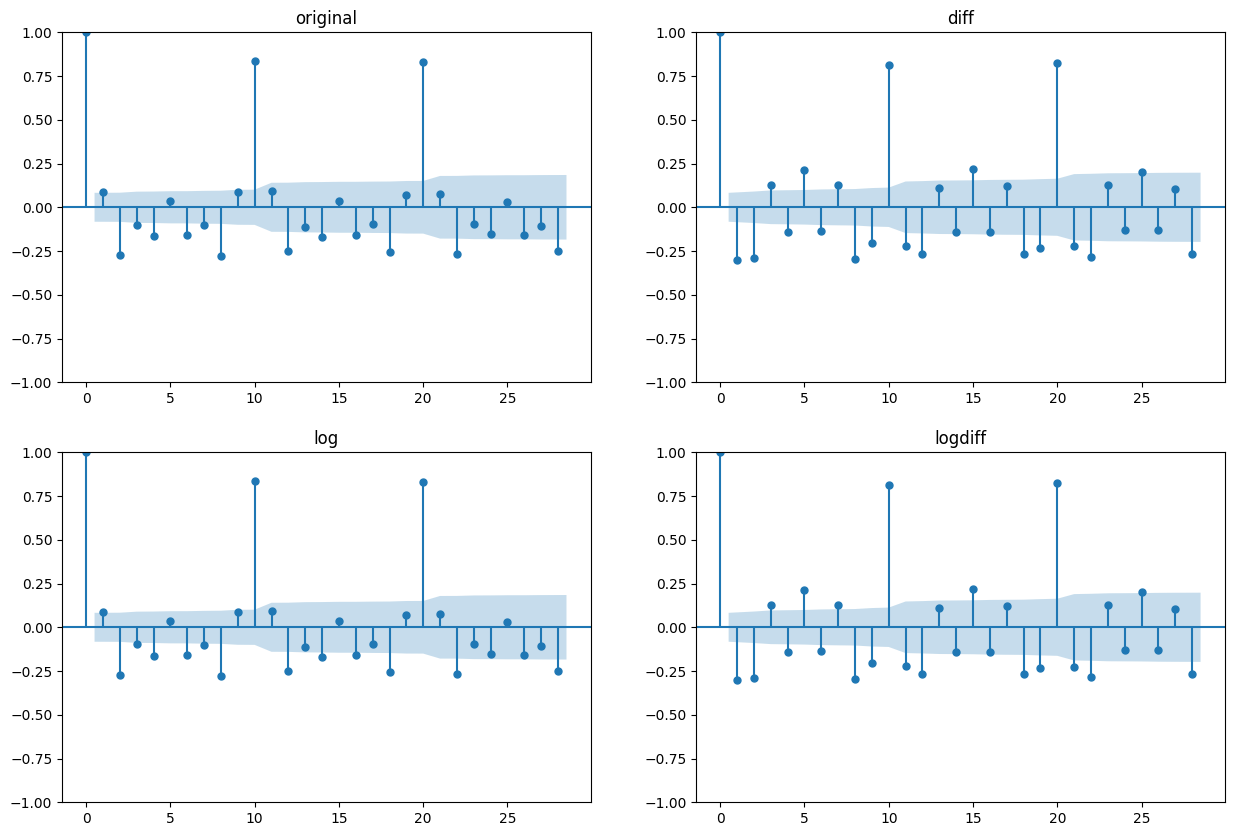

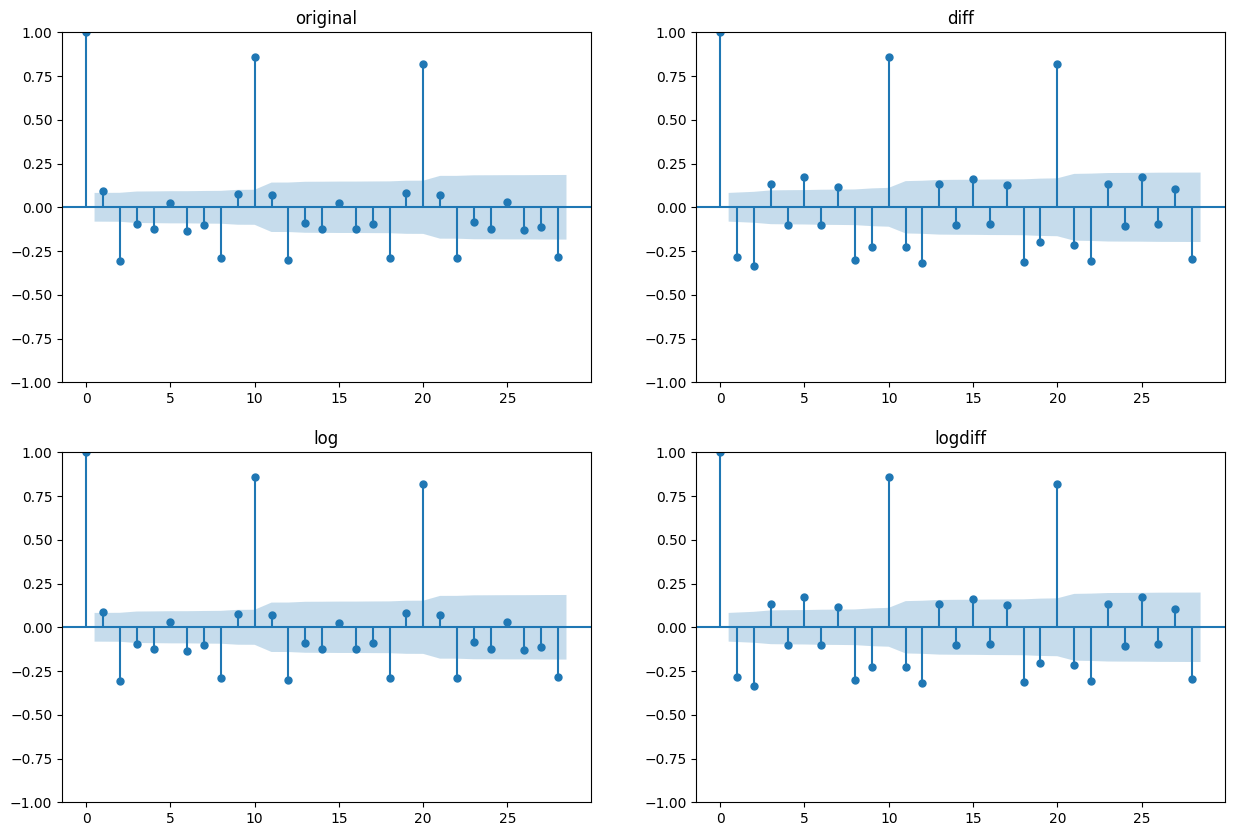

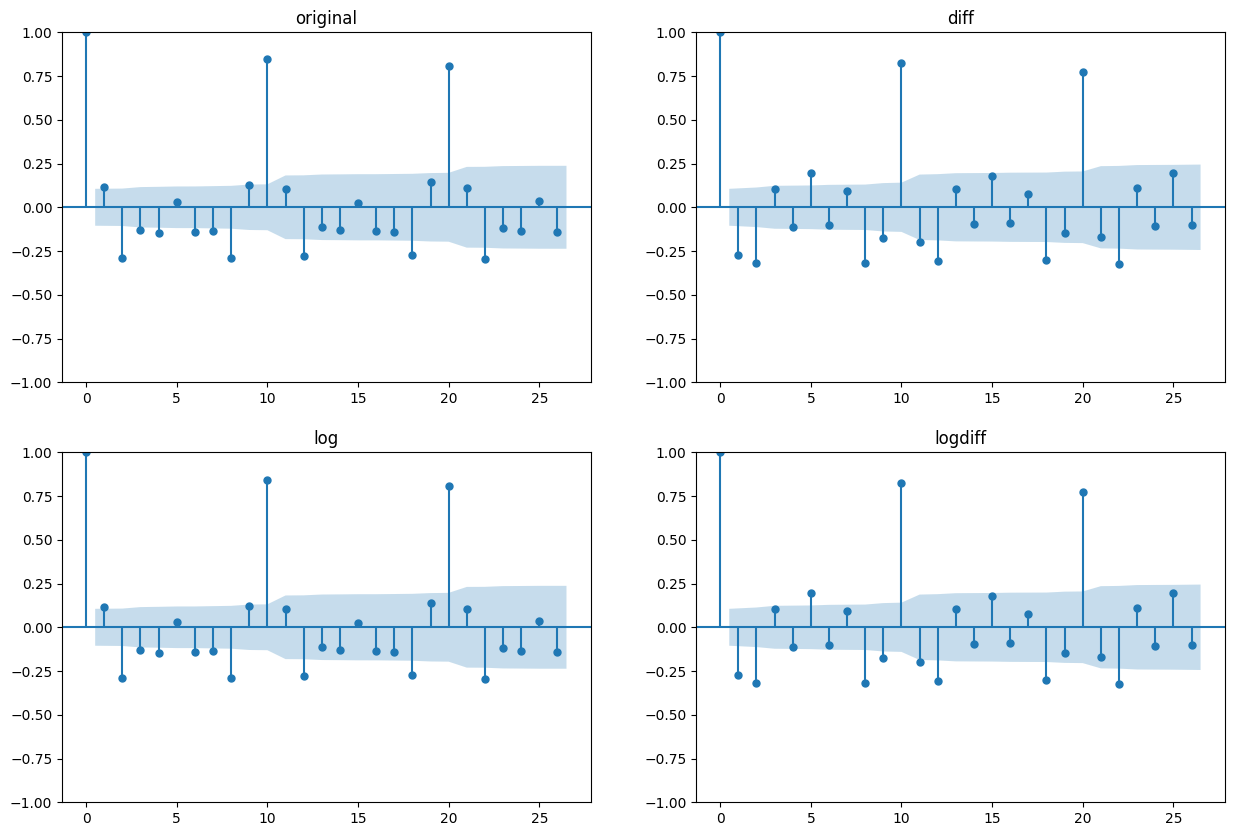

In [32]:
cols = ['INSP', 'diff','log', 'logdiff']
for rand in randlst:
    adfPlot(df_INSP, cols, proclst[rand])